In [4]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
from pathlib import Path
import math
import numpy as np
import sys
import matplotlib.pyplot as plt

sys.path.append(str(Path(os.getcwd()).parent))
from data_utilities import convert_age_from_days_to_years, extractqrcode, draw_age_distribution, calculate_code_age_distribution

### Total no. of artifacts in dataset

In [5]:
DATASET_PATH = Path('/mnt/datasets/95k_depthmap_trainingdata')

In [6]:
artifacts = pd.read_csv(DATASET_PATH / 'labels/training.csv')
print("Total no. of artifacts:", len(artifacts))
artifacts.head()

Total no. of artifacts: 96026


,artifact,storage_path,height,weight,key,age
0,pc_1583438052-nxew87bcv0_1591122011044_100_000.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260
1,pc_1583438052-nxew87bcv0_1591122011044_100_004.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260
2,pc_1583438052-nxew87bcv0_1591122011044_100_005.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260
3,pc_1583438052-nxew87bcv0_1591122011044_100_006.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260
4,pc_1583438052-nxew87bcv0_1591122011044_100_007.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260


In [4]:
#adding the Years column into dataframe
artifacts['Years'] = artifacts.apply(convert_age_from_days_to_years, axis=1)
artifacts.head()

,artifact,storage_path,height,weight,key,age,Years
0,pc_1583438052-nxew87bcv0_1591122011044_100_000.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3
1,pc_1583438052-nxew87bcv0_1591122011044_100_004.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3
2,pc_1583438052-nxew87bcv0_1591122011044_100_005.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3
3,pc_1583438052-nxew87bcv0_1591122011044_100_006.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3
4,pc_1583438052-nxew87bcv0_1591122011044_100_007.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3


### Total no. of children in the dataset

In [5]:
artifacts['qrcode'] = artifacts.apply(extractqrcode, axis=1)
scans = artifacts.drop_duplicates(subset='qrcode', keep='first')
print("Total no. of children:", len(scans))
scans.head()

Total no. of children: 4858


,artifact,storage_path,height,weight,key,age,Years,qrcode
0,pc_1583438052-nxew87bcv0_1591122011044_100_000.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.30,100,1260,3,1583438052-nxew87bcv0
11,pc_1583438084-zkafuhr4xx_1591122031563_100_000.p,qrcode/1583438084-zkafuhr4xx/measure/159112203...,104.4,14.80,100,1283,4,1583438084-zkafuhr4xx
24,pc_1583438117-71v1y4z0gd_1592711198959_100_000.p,qrcode/1583438117-71v1y4z0gd/measure/159271119...,104.1,14.75,100,1398,4,1583438117-71v1y4z0gd
33,pc_1583438117-spfyeecneo_1591122016705_100_000.p,qrcode/1583438117-spfyeecneo/measure/159112201...,98.3,12.55,100,1640,4,1583438117-spfyeecneo
48,pc_1583438127-xt6z0e0tsu_1591122024547_100_000.p,qrcode/1583438127-xt6z0e0tsu/measure/159112202...,89.7,11.50,100,140,0,1583438127-xt6z0e0tsu


0     889
1     785
2     712
3     895
4     974
5     587
6       1
50     15
Name: Years, dtype: int64


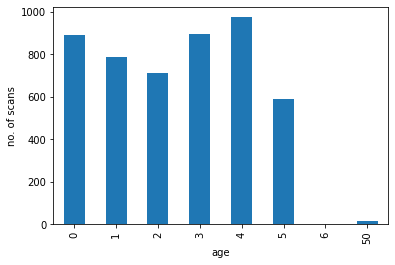

In [6]:
plt.figure()
draw_age_distribution(scans)
plt.show()

101    39059
100    24872
102    23301
202     6378
201     1292
200     1124
Name: key, dtype: int64


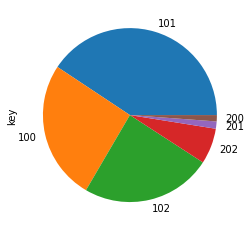

In [7]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(artifacts['key'].value_counts())
_ = artifacts['key'].value_counts().plot(kind='pie')

In [14]:
calculate_code_age_distribution(artifacts)

,0,1,2,3,4
codes,,,,,
100,5023,512,3312,5536,6564
101,7550,779,3705,9142,11086
102,4825,477,2723,5134,6230
200,80,857,162,0,7
201,163,883,201,8,0
202,622,4662,984,59,14


In [15]:
calculate_code_age_distribution(scans)

,0,1,2,3,4
codes,,,,,
100,671,75,492,793,901
101,67,17,37,51,46
102,57,14,37,42,25
200,10,106,20,0,1
201,11,54,15,1,0
202,73,519,111,8,1


### Distribution of height, weight and age against each other

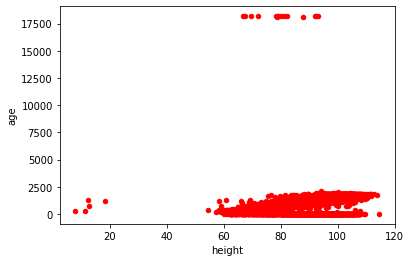

In [8]:
#distribution of height against age
height_vs_age = scans.plot.scatter(x='height', y='age', c='red')

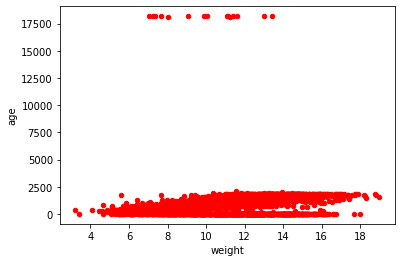

In [9]:
#distribution of weight against age
weight_vs_age = scans.plot.scatter(x='weight', y='age', c='red')

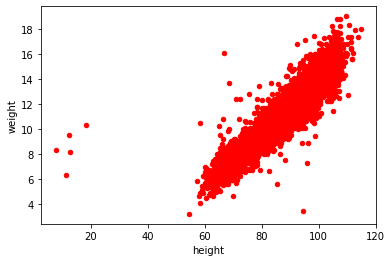

In [10]:
## distribution of height against weight
weight_vs_height = scans.plot.scatter(x='height', y='weight', c='red')

## Analyze unrelistic pixel values and target values

In [80]:
import pickle
from tqdm import tqdm

def get_qrcode(artifact: str) -> str:
    return artifact.split('/')[1]

def get_path(row: pd.Series) -> str:
    return f"{str(DATASET_PATH)}/scans/{row.qrcode}/{row.key}/{row.artifact}"

#### Check height

In [86]:
# Children should be between 40cm and 150cm tall, otherwise we assume something went wrong
unusual_height_artifacts = artifacts[(artifacts.height < 40.) | (artifacts.height > 150.)]

In [92]:
unusual_height_artifacts.head()

,artifact,storage_path,height,weight,key,age,qrcode,path
2643,pc_1583855791-ldfc59ywg5_1591621942032_100_000.p,qrcode/1583855791-ldfc59ywg5/measure/159162194...,12.3,12.6,100,1357,1583855791-ldfc59ywg5,/mnt/datasets/95k_depthmap_trainingdata/scans/...
2644,pc_1583855791-ldfc59ywg5_1591621942032_100_001.p,qrcode/1583855791-ldfc59ywg5/measure/159162194...,12.3,12.6,100,1357,1583855791-ldfc59ywg5,/mnt/datasets/95k_depthmap_trainingdata/scans/...
2645,pc_1583855791-ldfc59ywg5_1591621942032_100_002.p,qrcode/1583855791-ldfc59ywg5/measure/159162194...,12.3,12.6,100,1357,1583855791-ldfc59ywg5,/mnt/datasets/95k_depthmap_trainingdata/scans/...
2646,pc_1583855791-ldfc59ywg5_1591621942032_100_003.p,qrcode/1583855791-ldfc59ywg5/measure/159162194...,12.3,12.6,100,1357,1583855791-ldfc59ywg5,/mnt/datasets/95k_depthmap_trainingdata/scans/...
2647,pc_1583855791-ldfc59ywg5_1591621942032_100_004.p,qrcode/1583855791-ldfc59ywg5/measure/159162194...,12.3,12.6,100,1357,1583855791-ldfc59ywg5,/mnt/datasets/95k_depthmap_trainingdata/scans/...


In [88]:
unusual_height_artifacts.storage_path.iloc[0]

'qrcode/1583855791-ldfc59ywg5/measure/1591621942032/pc/pc_1583855791-ldfc59ywg5_1591621942032_100_000.pcd'

In [89]:
unusual_qrcodes = [get_qrcode(artifact) for artifact in unusual_height_artifacts.storage_path]

In [91]:
set(unusual_qrcodes)

{'1583855791-ldfc59ywg5',
 '1583997882-3jqstr1119',
 '1584998372-d85ogmqucw',
 '1585274424-3oqa4i262a',
 '1585360775-fa64muouel',
 '1585366118-qao4zsk0m3'}

#### Check pixel values

In [93]:
artifacts['qrcode'] = artifacts.storage_path.apply(get_qrcode)
artifacts['path'] = artifacts.apply(get_path, axis=1)

In [94]:
artifacts.head()

,artifact,storage_path,height,weight,key,age,qrcode,path
0,pc_1583438052-nxew87bcv0_1591122011044_100_000.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,1583438052-nxew87bcv0,/mnt/datasets/95k_depthmap_trainingdata/scans/...
1,pc_1583438052-nxew87bcv0_1591122011044_100_004.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,1583438052-nxew87bcv0,/mnt/datasets/95k_depthmap_trainingdata/scans/...
2,pc_1583438052-nxew87bcv0_1591122011044_100_005.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,1583438052-nxew87bcv0,/mnt/datasets/95k_depthmap_trainingdata/scans/...
3,pc_1583438052-nxew87bcv0_1591122011044_100_006.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,1583438052-nxew87bcv0,/mnt/datasets/95k_depthmap_trainingdata/scans/...
4,pc_1583438052-nxew87bcv0_1591122011044_100_007.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,1583438052-nxew87bcv0,/mnt/datasets/95k_depthmap_trainingdata/scans/...


In [95]:
! ls {artifacts.path.iloc[0]}

/mnt/datasets/95k_depthmap_trainingdata/scans/1583438052-nxew87bcv0/100/pc_1583438052-nxew87bcv0_1591122011044_100_000.p


In [97]:
unusual_pixel_artifacts = []
for path in tqdm(artifacts['path']):
    depthmap, targets = pickle.load(open(path, "rb"))
    max_value = depthmap.max()
    if max_value >= 10:
        unusual_pixel_artifacts.append(path)
        print(f"{path} has a (unexpectedly big) maximal pixel value of {max_value}")
    min_value = depthmap.min()
    if min_value < 0:
        unusual_pixel_artifacts.append(path)
        print(f"{path} has a (unexpectedly small) minimal pixel value of {max_value}")

 47%|████▋     | 45190/96026 [12:31<13:04, 64.79it/s]

/mnt/datasets/95k_depthmap_trainingdata/scans/1585010027-xb21f31tvj/101/pc_1585010027-xb21f31tvj_1592674994326_101_015.p has a (unexpectedly big) maximal pixel value of 714286.0


100%|██████████| 96026/96026 [29:08<00:00, 54.92it/s]   


In [98]:
unusual_pixel_artifacts

['/mnt/datasets/95k_depthmap_trainingdata/scans/1585010027-xb21f31tvj/101/pc_1585010027-xb21f31tvj_1592674994326_101_015.p']